In [1]:
import sys
sys.path.insert(0, "/Users/alexanderholstrup/git/VisualPlaceRecognition/cnnimageretrieval-pytorch")

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import h5py


from cirtorch.utils.view_angle import field_of_view, ious, plot_fov
%matplotlib inline

In [3]:
city = 'zurich'

q_postproc = pd.read_csv(f'/Users/alexanderholstrup/git/VisualPlaceRecognition/cnnimageretrieval-pytorch/notebooks/data/IT5/MSEAndContrastive400/Train/Images/{city}/query/postprocessed.csv')
q_raw = pd.read_csv(f'/Users/alexanderholstrup/git/VisualPlaceRecognition/cnnimageretrieval-pytorch/notebooks/data/IT5/MSEAndContrastive400/Train/Images/{city}/query/raw.csv')

db_postproc = pd.read_csv(f'/Users/alexanderholstrup/git/VisualPlaceRecognition/cnnimageretrieval-pytorch/notebooks/data/IT5/MSEAndContrastive400/Train/Images/{city}/database/postprocessed.csv')
db_raw = pd.read_csv(f'/Users/alexanderholstrup/git/VisualPlaceRecognition/cnnimageretrieval-pytorch/notebooks/data/IT5/MSEAndContrastive400/Train/Images/{city}/database/raw.csv')

In [4]:
with h5py.File('/Users/alexanderholstrup/Downloads/zurich_gt.h5', "r") as f:
    binary_similarity=f["sim"][:]
    graded_similarity=f["fov"][:]

In [5]:
N_q, N_db = np.shape(binary_similarity)
print(f'Query images: {N_q}\nDatabase images: {N_db}')

Query images: 2193
Database images: 2991


===> 0 / 10
===> 1 / 10
===> 2 / 10
===> 3 / 10
===> 4 / 10
===> 5 / 10
===> 6 / 10
===> 7 / 10
===> 8 / 10
===> 9 / 10


(array([1., 1., 0., 0., 2., 1., 1., 1., 1., 2.]),
 array([-0.00086394, -0.00084044, -0.00081694, -0.00079344, -0.00076993,
        -0.00074643, -0.00072293, -0.00069943, -0.00067593, -0.00065243,
        -0.00062892]),
 <BarContainer object of 10 artists>)

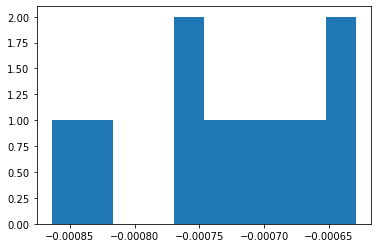

In [7]:
difference = []
N = min(10, N_q)
Start = 0
for i in range(Start, Start+N):
    gps = q_postproc.iloc[[i]].values[0][2:4].tolist()
    ca = q_raw.iloc[[i]].values[0][4]
    q_coor = gps + [ca]
    db_coors = []
    points = [q_coor]
    for j in range(N_db):
        gps = db_postproc.iloc[[j]].values[0][2:4].tolist()
        ca = db_raw.iloc[[j]].values[0][4]
        db_coor = gps + [ca]
        points.append(db_coor)
    pol = field_of_view(points, approximation=25)
    calc_ious = np.array(ious(pol[0], pol[1:]))
    grad_ious = np.array(graded_similarity[i, :])

    difference.append(np.sum(calc_ious - grad_ious) / np.size(calc_ious[calc_ious != 0]))
    print(f'===> {i} / {Start+N}')
plt.hist(difference)

Text(0.5, 0, 'Difference between precomputed IoU and our IoU')

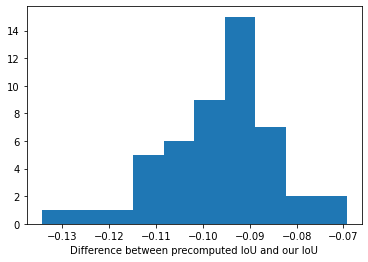

In [7]:
plt.hist(difference)
plt.xlabel('Difference between precomputed IoU and our IoU')